# EQUITY AMERICAN OPTIONS

Valuation and Risk of American-style options on equity

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import *
from financepy.market.curves import *
from financepy.products.equity import *

####################################################################
# FINANCEPY BETA Version 0.180 - This build:  23 Sep 2020 at 00:02 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#    For bug reports and comments - allmypythonprojects@gmail.com  #
####################################################################



# Define the Call and Put Options

In [3]:
valueDate = FinDate(1, 1, 2015)

In [4]:
expiryDate = valueDate.addYears(0.5)

In [5]:
expiryDate

WED 01 JUL 2015

In [6]:
strikePrice = 50.0

Let's create a put and a call using the Vanilla class

In [7]:
europeanCallOption = FinEquityVanillaOption(expiryDate, strikePrice, FinOptionTypes.EUROPEAN_CALL)

In [8]:
europeanPutOption = FinEquityVanillaOption(expiryDate, strikePrice, FinOptionTypes.EUROPEAN_PUT)

Now let's create a put and a call American and European option types using the American class

In [9]:
europeanAmericanCallOption = FinEquityAmericanOption(expiryDate, strikePrice, FinOptionTypes.EUROPEAN_CALL)

In [10]:
europeanAmericanPutOption = FinEquityAmericanOption(expiryDate, strikePrice, FinOptionTypes.EUROPEAN_PUT)

In [11]:
americanCallOption = FinEquityAmericanOption(expiryDate, strikePrice, FinOptionTypes.AMERICAN_CALL)

In [12]:
americanPutOption = FinEquityAmericanOption(expiryDate, strikePrice, FinOptionTypes.AMERICAN_PUT)

In [13]:
print(americanCallOption)

OBJECT TYPE: FinEquityAmericanOption
EXPIRY DATE: WED 01 JUL 2015
STRIKE PRICE: 50.0
OPTION TYPE: FinOptionTypes.AMERICAN_CALL
NUMBER: 1.0


In [14]:
print(americanPutOption)

OBJECT TYPE: FinEquityAmericanOption
EXPIRY DATE: WED 01 JUL 2015
STRIKE PRICE: 50.0
OPTION TYPE: FinOptionTypes.AMERICAN_PUT
NUMBER: 1.0


## Valuation

In [15]:
stockPrice = 50.0
volatility = 0.20
interestRate = 0.05
dividendYield = 0.0

In [16]:
discountCurve = FinDiscountCurveFlat(valueDate, interestRate)

In [17]:
model = FinEquityModelBlackScholes(volatility)

In [18]:
europeanCallOption.value(valueDate, stockPrice, discountCurve, dividendYield, model)

3.427663335316737

In [19]:
europeanAmericanCallOption.value(valueDate, stockPrice, discountCurve, dividendYield, model)

3.42741642857849

These prices should be the same even though one is using the BS formula and the other uses the CRR tree

In [20]:
americanCallOption.value(valueDate, stockPrice, discountCurve, dividendYield, model)

3.42741642857849

In [21]:
europeanPutOption.value(valueDate, stockPrice, discountCurve, dividendYield, model)

2.203180273602875

In [22]:
europeanAmericanPutOption.value(valueDate, stockPrice, discountCurve, dividendYield, model)

2.202933366865298

These prices should be the same even though one is using the BS formula and the other uses the CRR tree

In [23]:
americanPutOption.value(valueDate, stockPrice, discountCurve, dividendYield, model)

2.32149571056007

This price is higher as there is an advantage to exercising early when holding an American put

## Risk Measures

You can calculate the risk measures using using perturbatory analysis

In [24]:
americanCallOption.delta(valueDate, stockPrice, discountCurve, dividendYield, model)

0.6166445290567424

In [25]:
americanCallOption.gamma(valueDate, stockPrice, discountCurve, dividendYield, model)

386.0401478483766

In [26]:
americanCallOption.theta(valueDate, stockPrice, discountCurve, dividendYield, model)

-4.073143757577362

In [27]:
americanCallOption.rho(valueDate, stockPrice, discountCurve, dividendYield, model)

13.104170280220373

In [28]:
americanCallOption.vega(valueDate, stockPrice, discountCurve, dividendYield, model)

13.62723968213686

## Vectorisation

In [29]:
stockPrices = np.linspace(20.0,80.0,100)

In [30]:
value = americanCallOption.value(valueDate, stockPrices, discountCurve, dividendYield, model)

Text(0, 0.5, 'Option Premium')

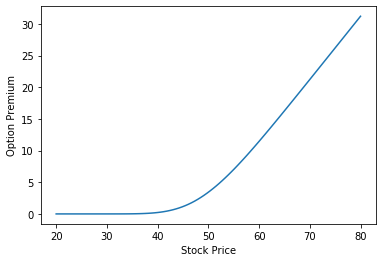

In [31]:
plt.plot(stockPrices, value)
plt.xlabel("Stock Price")
plt.ylabel("Option Premium")

## Risk Measures using Vectorisations

In [32]:
deltas = americanCallOption.delta(valueDate, stockPrices, discountCurve, dividendYield, model)

Text(0, 0.5, 'Option Deltas')

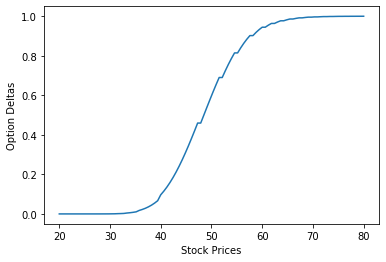

In [33]:
plt.plot(stockPrices, deltas)
plt.xlabel("Stock Prices")
plt.ylabel("Option Deltas")

In [34]:
gammas = americanCallOption.gamma(valueDate, stockPrices, discountCurve, dividendYield, model)

Text(0, 0.5, 'Option Gamma')

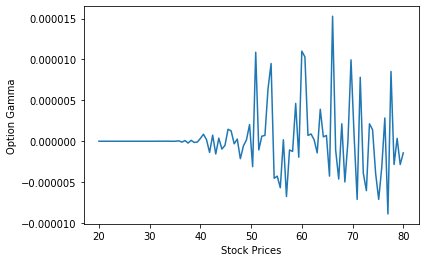

In [35]:
plt.plot(stockPrices, gammas)
plt.xlabel("Stock Prices")
plt.ylabel("Option Gamma")

In [36]:
thetas = americanCallOption.theta(valueDate, stockPrices, discountCurve, dividendYield, model)

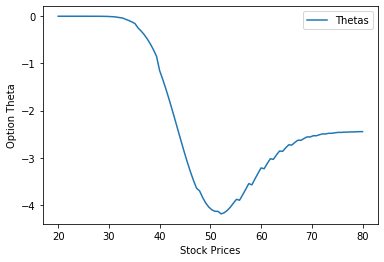

In [37]:
plt.plot(stockPrices, thetas, label="Thetas")
plt.xlabel("Stock Prices")
plt.ylabel("Option Theta")
plt.legend()

In [38]:
rhos = americanCallOption.rho(valueDate, stockPrices, discountCurve, dividendYield, model)

Text(0, 0.5, 'Option Rho')

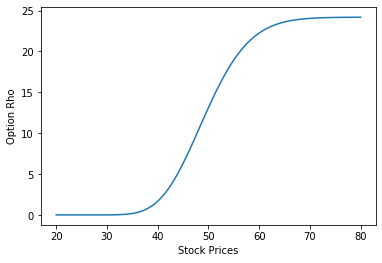

In [39]:
plt.plot(stockPrices, rhos)
plt.xlabel("Stock Prices")
plt.ylabel("Option Rho")

Copyright (c) 2020 Dominic O'Kane